In [2]:
frame = pd.read_csv('history.csv',delimiter=';',parse_dates=['date_time'])
frame['minute'] = frame['date_time'].dt.minute
frame['hour'] = frame['date_time'].dt.hour
frame['day_of_week'] = frame['date_time'].dt.weekday_name
frame['month'] = frame['date_time'].dt.month
frame['minute']=frame['minute']+frame['hour']*60
frame.drop('id',inplace=True,axis=1)

In [5]:
print(frame)
frame.dtypes

        temp  humidity           date_time  minute  hour day_of_week  month
0         21        20 2016-08-17 00:00:01       0     0   Wednesday      8
1         21        20 2016-08-17 00:01:01       1     0   Wednesday      8
2         21        20 2016-08-17 00:02:01       2     0   Wednesday      8
3         21        20 2016-08-17 00:03:01       3     0   Wednesday      8
4         21        20 2016-08-17 00:04:01       4     0   Wednesday      8
5         21        20 2016-08-17 00:05:02       5     0   Wednesday      8
6         21        20 2016-08-17 00:06:01       6     0   Wednesday      8
7         21        20 2016-08-17 00:07:01       7     0   Wednesday      8
8         20        21 2016-08-17 00:08:01       8     0   Wednesday      8
9         21        20 2016-08-17 00:09:01       9     0   Wednesday      8
10        21        20 2016-08-17 00:10:02      10     0   Wednesday      8
11        20        21 2016-08-17 00:11:01      11     0   Wednesday      8
12        21

temp                    int64
humidity                int64
date_time      datetime64[ns]
minute                  int64
hour                    int64
day_of_week            object
month                   int64
dtype: object

In [3]:
X1=frame.ix[frame['day_of_week']=='Monday']
X2=frame.ix[frame['day_of_week']=='Tuesday']
X3=frame.ix[frame['day_of_week']=='Wednesday']
X4=frame.ix[frame['day_of_week']=='Thursday']
X5=frame.ix[frame['day_of_week']=='Friday']
X6=frame.ix[frame['day_of_week']=='Saturday']
X7=frame.ix[frame['day_of_week']=='Sunday']

C:\Users\devyash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [16]:
print(X3)

        temp  humidity           date_time  minute  hour day_of_week  month
0         21        20 2016-08-17 00:00:01       0     0   Wednesday      8
1         21        20 2016-08-17 00:01:01       1     0   Wednesday      8
2         21        20 2016-08-17 00:02:01       2     0   Wednesday      8
3         21        20 2016-08-17 00:03:01       3     0   Wednesday      8
4         21        20 2016-08-17 00:04:01       4     0   Wednesday      8
5         21        20 2016-08-17 00:05:02       5     0   Wednesday      8
6         21        20 2016-08-17 00:06:01       6     0   Wednesday      8
7         21        20 2016-08-17 00:07:01       7     0   Wednesday      8
8         20        21 2016-08-17 00:08:01       8     0   Wednesday      8
9         21        20 2016-08-17 00:09:01       9     0   Wednesday      8
10        21        20 2016-08-17 00:10:02      10     0   Wednesday      8
11        20        21 2016-08-17 00:11:01      11     0   Wednesday      8
12        21

In [47]:
x1=X1.iloc[:,[0,3]].values

In [48]:
print(x1)

[[  20    0]
 [  21    1]
 [  20    2]
 ...
 [  19 1437]
 [  19 1438]
 [  20 1439]]


In [42]:
y1=X1.iloc[:,0].values

In [43]:
print(y1)

[20 21 20 ... 19 19 20]


In [44]:
len(y1)

112652

In [45]:
len(X1)

112652

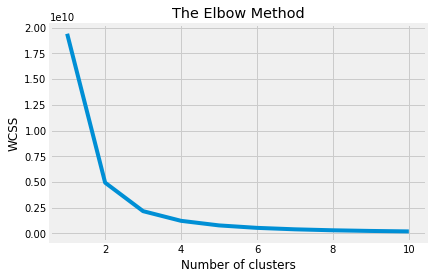

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

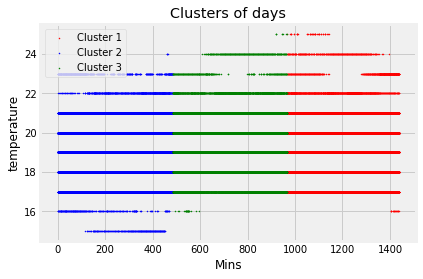

In [50]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x1)

# Visualising the clusters
plt.scatter(x1[y_kmeans == 0, 1], x1[y_kmeans == 0, 0], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(x1[y_kmeans == 1, 1], x1[y_kmeans == 1, 0], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[y_kmeans == 2, 1], x1[y_kmeans == 2, 0], s = 1, c = 'green', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of days')
plt.xlabel('Mins')
plt.ylabel('temperature')
plt.legend()
plt.show()

In [52]:
x2=X2.iloc[:,[0,3]].values
x3=X3.iloc[:,[0,3]].values
x4=X4.iloc[:,[0,3]].values
x5=X5.iloc[:,[0,3]].values
x6=X6.iloc[:,[0,3]].values
x7=X7.iloc[:,[0,3]].values

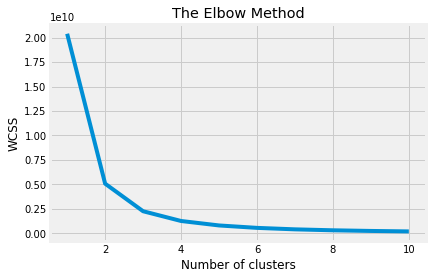

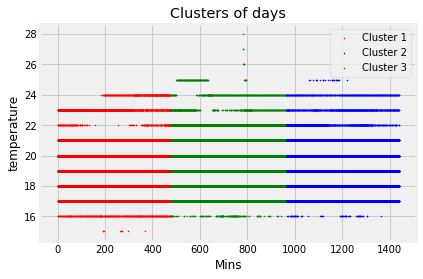

In [53]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x2)

# Visualising the clusters
plt.scatter(x2[y_kmeans == 0, 1], x2[y_kmeans == 0, 0], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(x2[y_kmeans == 1, 1], x2[y_kmeans == 1, 0], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(x2[y_kmeans == 2, 1], x2[y_kmeans == 2, 0], s = 1, c = 'green', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of days')
plt.xlabel('Mins')
plt.ylabel('temperature')
plt.legend()
plt.show()

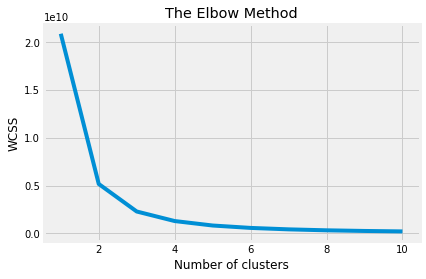

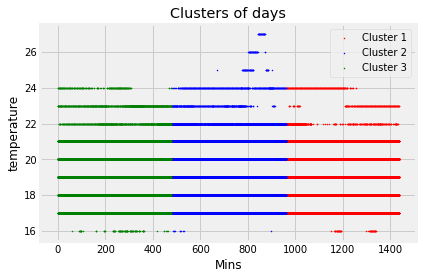

In [55]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x3)

# Visualising the clusters
plt.scatter(x3[y_kmeans == 0, 1], x3[y_kmeans == 0, 0], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(x3[y_kmeans == 1, 1], x3[y_kmeans == 1, 0], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(x3[y_kmeans == 2, 1], x3[y_kmeans == 2, 0], s = 1, c = 'green', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of days')
plt.xlabel('Mins')
plt.ylabel('temperature')
plt.legend()
plt.show()

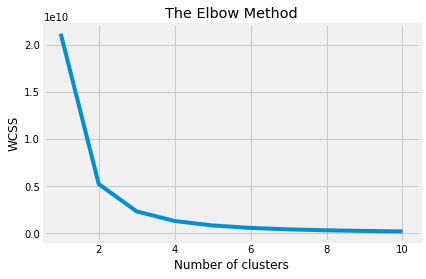

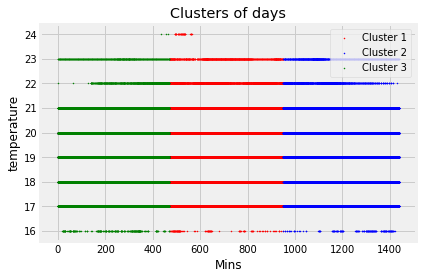

In [56]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x4)

# Visualising the clusters
plt.scatter(x4[y_kmeans == 0, 1], x4[y_kmeans == 0, 0], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(x4[y_kmeans == 1, 1], x4[y_kmeans == 1, 0], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(x4[y_kmeans == 2, 1], x4[y_kmeans == 2, 0], s = 1, c = 'green', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of days')
plt.xlabel('Mins')
plt.ylabel('temperature')
plt.legend()
plt.show()

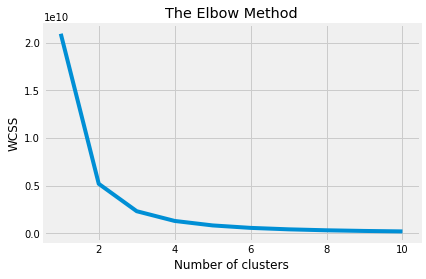

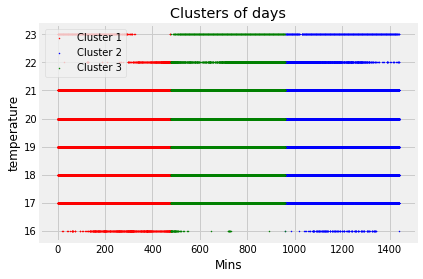

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x5)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x5)

# Visualising the clusters
plt.scatter(x5[y_kmeans == 0, 1], x5[y_kmeans == 0, 0], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(x5[y_kmeans == 1, 1], x5[y_kmeans == 1, 0], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(x5[y_kmeans == 2, 1], x5[y_kmeans == 2, 0], s = 1, c = 'green', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of days')
plt.xlabel('Mins')
plt.ylabel('temperature')
plt.legend()
plt.show()

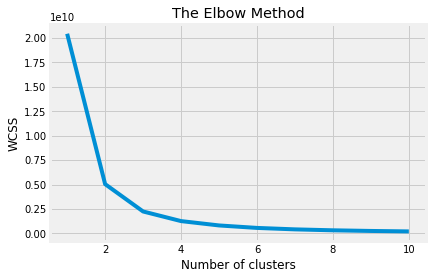

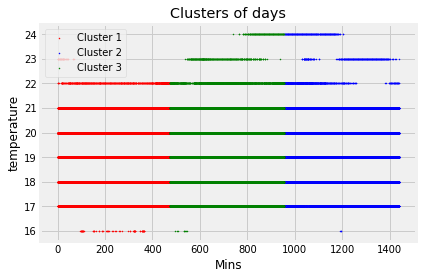

In [58]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x6)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x6)

# Visualising the clusters
plt.scatter(x6[y_kmeans == 0, 1], x6[y_kmeans == 0, 0], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(x6[y_kmeans == 1, 1], x6[y_kmeans == 1, 0], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(x6[y_kmeans == 2, 1], x6[y_kmeans == 2, 0], s = 1, c = 'green', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of days')
plt.xlabel('Mins')
plt.ylabel('temperature')
plt.legend()
plt.show()

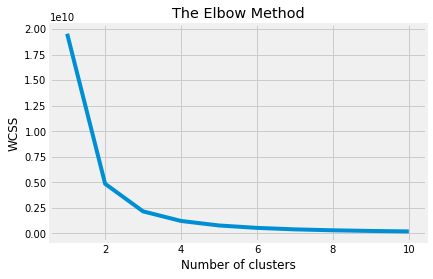

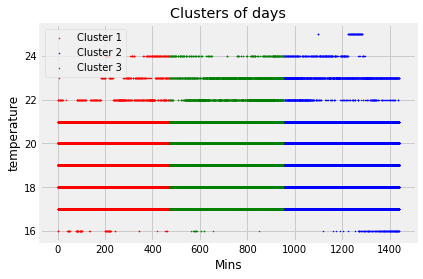

In [59]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x7)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x7)

# Visualising the clusters
plt.scatter(x7[y_kmeans == 0, 1], x7[y_kmeans == 0, 0], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(x7[y_kmeans == 1, 1], x7[y_kmeans == 1, 0], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(x7[y_kmeans == 2, 1], x7[y_kmeans == 2, 0], s = 1, c = 'green', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of days')
plt.xlabel('Mins')
plt.ylabel('temperature')
plt.legend()
plt.show()

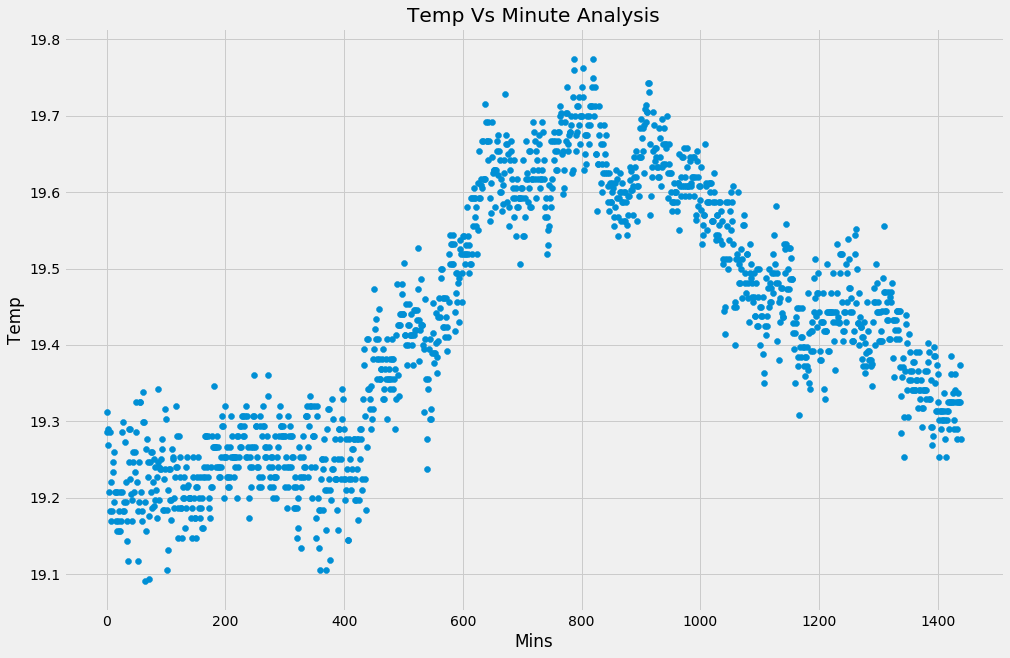

In [31]:
plt.figure(figsize=(15,10))
byh = X1.loc[:,['temp','minute']].groupby('minute',as_index=False).mean()
plt.scatter(byh['minute'],byh['temp'])
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.savefig("MON_MINUTE.jpg")

In [19]:
print(byh)

      minute       temp
0          0  19.311688
1          1  19.285714
2          2  19.289474
3          3  19.269231
4          4  19.207792
5          5  19.181818
6          6  19.285714
7          7  19.168831
8          8  19.220779
9          9  19.181818
10        10  19.233766
11        11  19.246753
12        12  19.259740
13        13  19.194805
14        14  19.207792
15        15  19.207792
16        16  19.168831
17        17  19.155844
18        18  19.207792
19        19  19.168831
20        20  19.155844
21        21  19.181818
22        22  19.207792
23        23  19.155844
24        24  19.168831
25        25  19.285714
26        26  19.207792
27        27  19.298701
28        28  19.181818
29        29  19.194805
...      ...        ...
1410    1410  19.337349
1411    1411  19.313253
1412    1412  19.301205
1413    1413  19.277108
1414    1414  19.253012
1415    1415  19.301205
1416    1416  19.313253
1417    1417  19.313253
1418    1418  19.325301
1419    1419  19

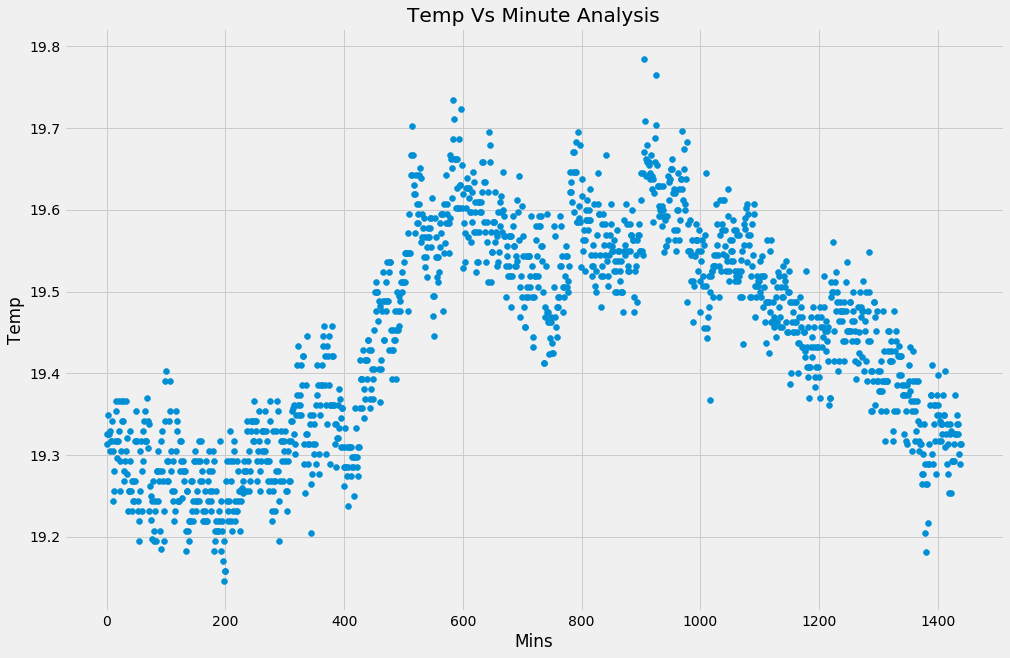

In [32]:
plt.figure(figsize=(15,10))
byh = X2.loc[:,['temp','minute']].groupby('minute',as_index=False).mean()
plt.scatter(byh['minute'],byh['temp'])
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.savefig("TUES_MINUTE.jpg")

In [13]:
print(byh)

             temp
minute           
0       19.311688
1       19.285714
2       19.289474
3       19.269231
4       19.207792
5       19.181818
6       19.285714
7       19.168831
8       19.220779
9       19.181818
10      19.233766
11      19.246753
12      19.259740
13      19.194805
14      19.207792
15      19.207792
16      19.168831
17      19.155844
18      19.207792
19      19.168831
20      19.155844
21      19.181818
22      19.207792
23      19.155844
24      19.168831
25      19.285714
26      19.207792
27      19.298701
28      19.181818
29      19.194805
...           ...
1410    19.337349
1411    19.313253
1412    19.301205
1413    19.277108
1414    19.253012
1415    19.301205
1416    19.313253
1417    19.313253
1418    19.325301
1419    19.289157
1420    19.325301
1421    19.325301
1422    19.361446
1423    19.385542
1424    19.325301
1425    19.337349
1426    19.325301
1427    19.301205
1428    19.289157
1429    19.341463
1430    19.361446
1431    19.325301
1432    19

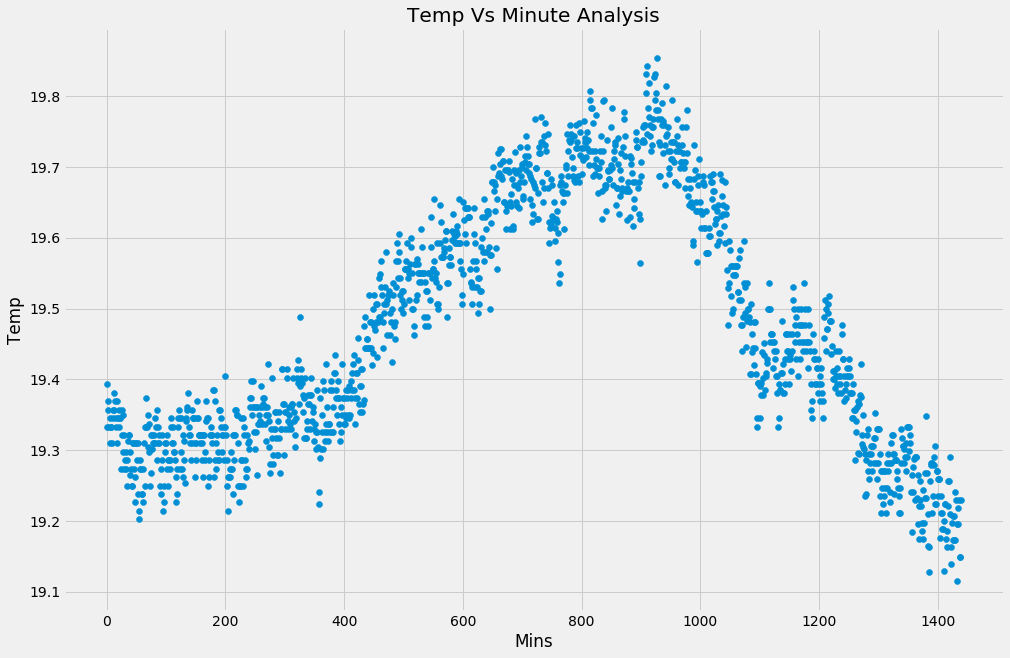

In [33]:
plt.figure(figsize=(15,10))
byh = X3.loc[:,['temp','minute']].groupby('minute',as_index=False).mean()
plt.scatter(byh['minute'],byh['temp'])
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.savefig("WED_MINUTE.jpg")

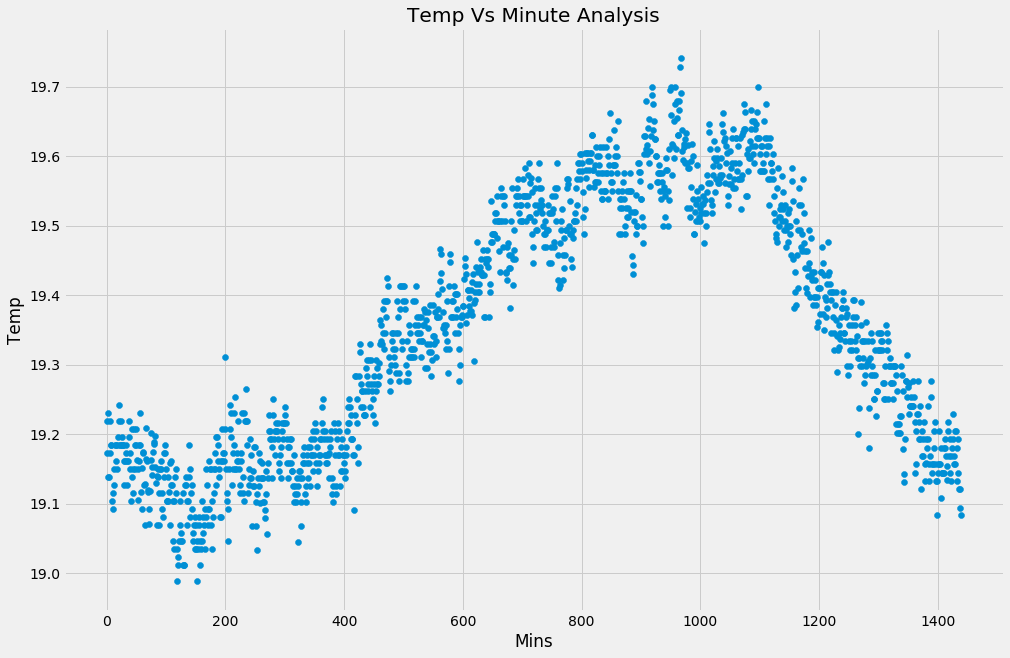

In [34]:
plt.figure(figsize=(15,10))
byh = X4.loc[:,['temp','minute']].groupby('minute',as_index=False).mean()
plt.scatter(byh['minute'],byh['temp'])
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.savefig("THURS_MINUTE.jpg")

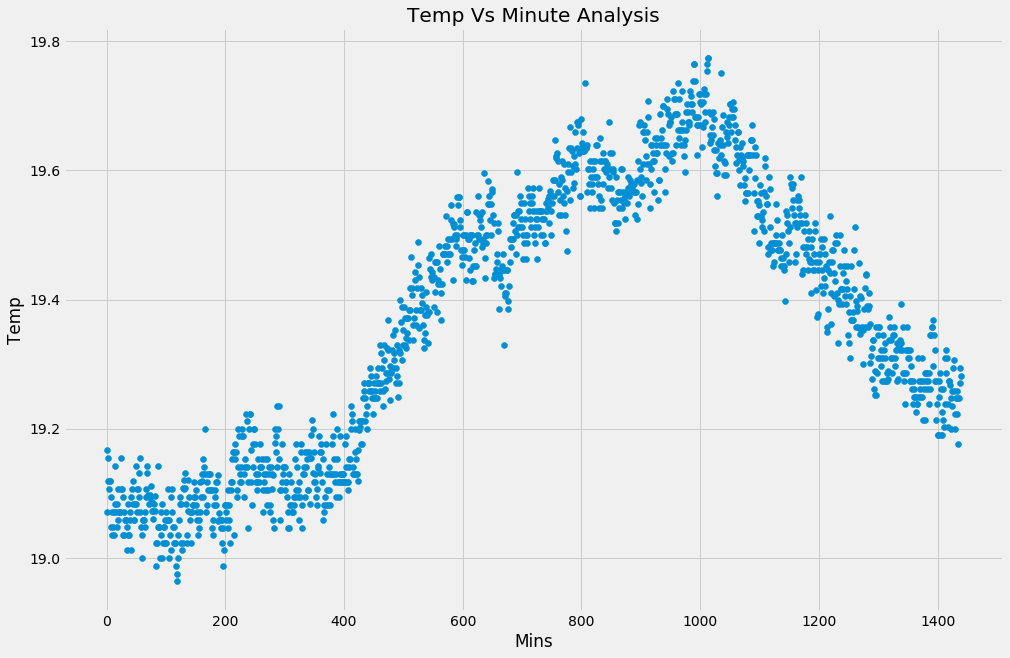

In [35]:
plt.figure(figsize=(15,10))
byh = X5.loc[:,['temp','minute']].groupby('minute',as_index=False).mean()
plt.scatter(byh['minute'],byh['temp'])
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.savefig("FRI_MINUTE.jpg")

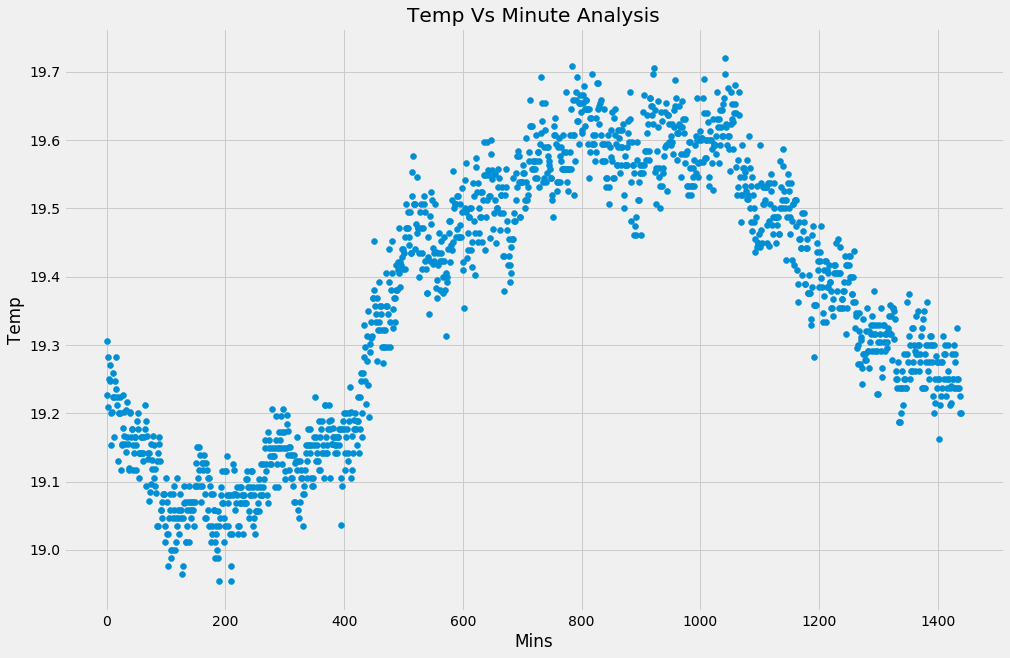

In [36]:
plt.figure(figsize=(15,10))
byh = X6.loc[:,['temp','minute']].groupby('minute',as_index=False).mean()
plt.scatter(byh['minute'],byh['temp'])
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.savefig("SAT_MINUTE.jpg")

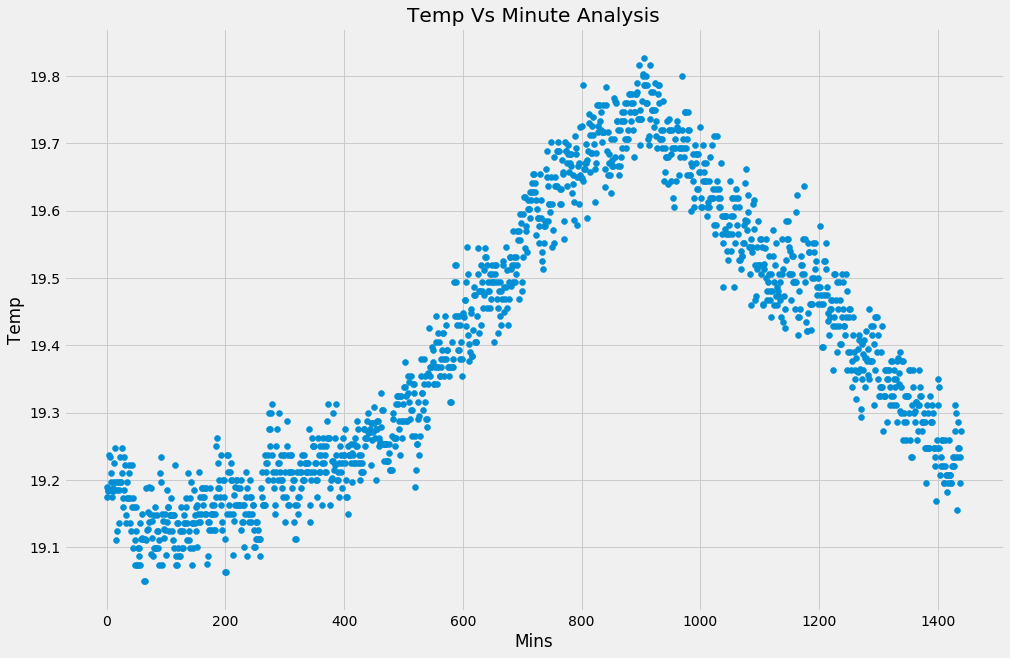

In [37]:
plt.figure(figsize=(15,10))
byh = X7.loc[:,['temp','minute']].groupby('minute',as_index=False).mean()
plt.scatter(byh['minute'],byh['temp'])
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.savefig("SUN_MINUTE.jpg")

In [70]:
print(X1)

        temp  humidity           date_time  minute  hour day_of_week  month
7195      20        20 2016-08-22 00:00:02       0     0      Monday      8
7196      21        20 2016-08-22 00:01:01       1     0      Monday      8
7197      20        20 2016-08-22 00:02:02       2     0      Monday      8
7198      19        20 2016-08-22 00:03:01       3     0      Monday      8
7199      21        20 2016-08-22 00:04:01       4     0      Monday      8
7200      19        20 2016-08-22 00:05:02       5     0      Monday      8
7201      19        20 2016-08-22 00:06:01       6     0      Monday      8
7202      21        20 2016-08-22 00:07:01       7     0      Monday      8
7203      21        20 2016-08-22 00:08:02       8     0      Monday      8
7204      20        20 2016-08-22 00:09:01       9     0      Monday      8
7205      20        20 2016-08-22 00:10:02      10     0      Monday      8
7206      20        20 2016-08-22 00:11:01      11     0      Monday      8
7207      20

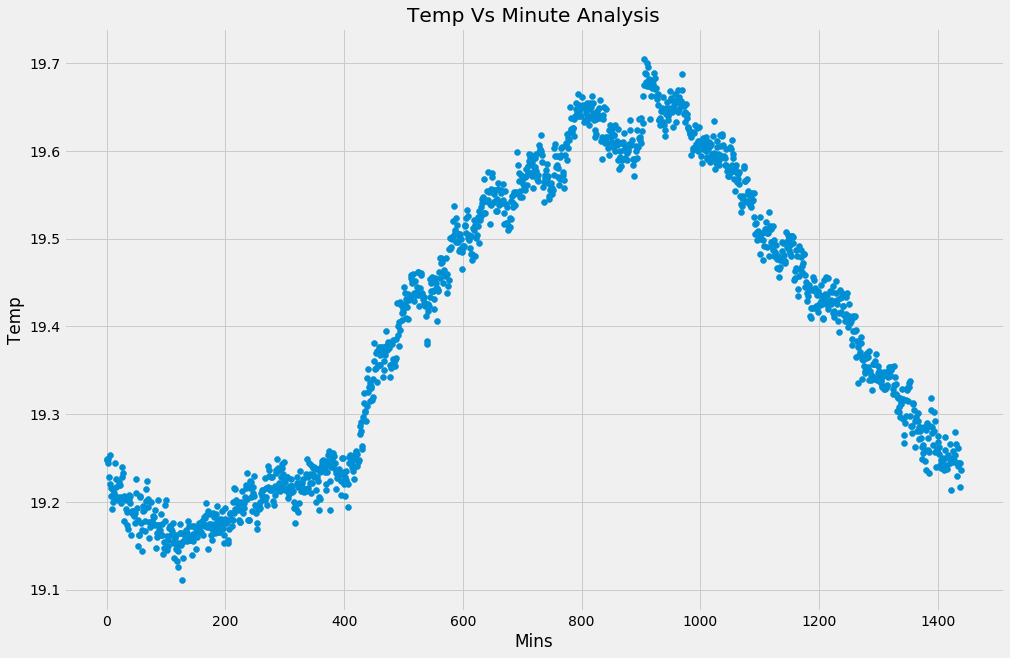

In [38]:
plt.figure(figsize=(15,10))
byh = frame.loc[:,['temp','minute']].groupby('minute',as_index=False).mean()
plt.scatter(byh['minute'],byh['temp'])
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.savefig("GEN_MINUTE.jpg")

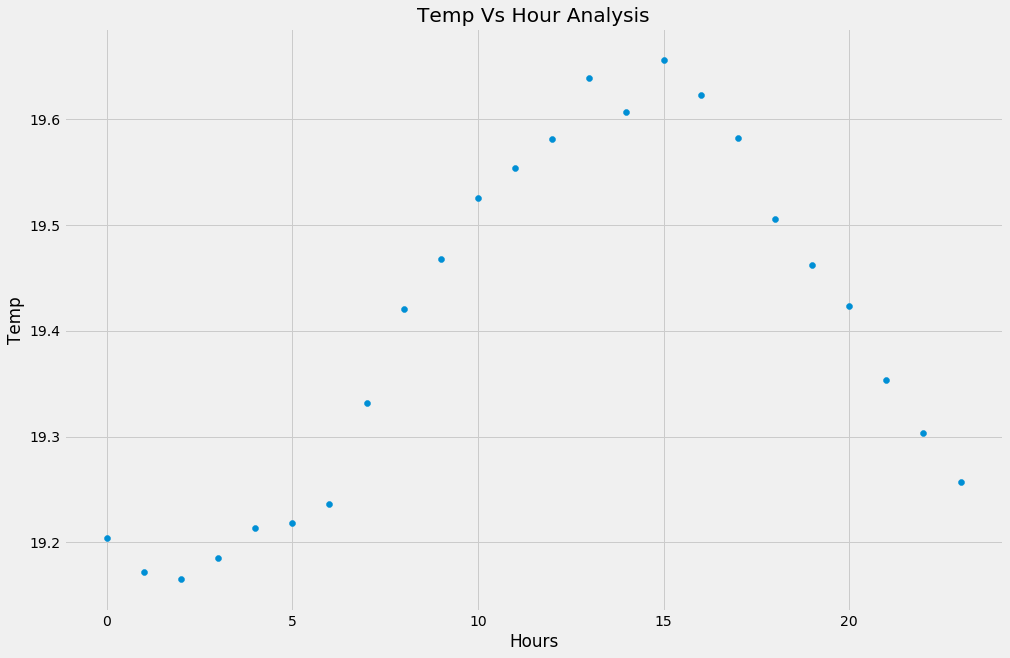

In [39]:
plt.figure(figsize=(15,10))
byh = frame.loc[:,['temp','hour']].groupby('hour').mean()
plt.scatter(np.array(byh.index),byh['temp'])
plt.title('Temp Vs Hour Analysis')
plt.xlabel('Hours')
plt.ylabel('Temp')
plt.savefig("HOUR.jpg")

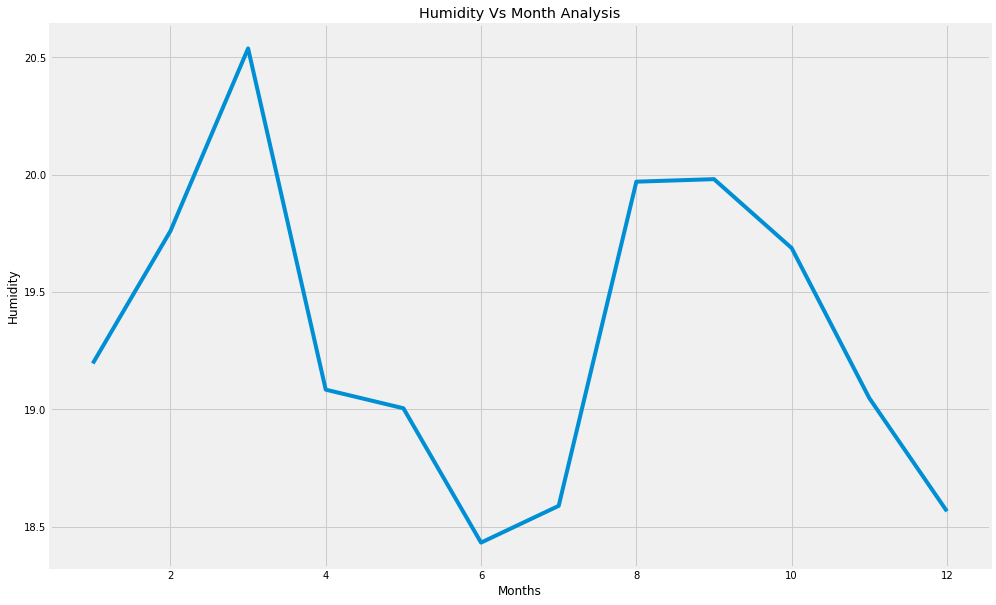

In [5]:
plt.figure(figsize=(15,10))
byh = frame.loc[:,['temp','month']].groupby('month').mean()
plt.plot(np.array(byh.index),byh['temp'])
plt.title('Humidity Vs Month Analysis')
plt.xlabel('Months')
plt.ylabel('Humidity')
plt.savefig("MONTH.jpg")

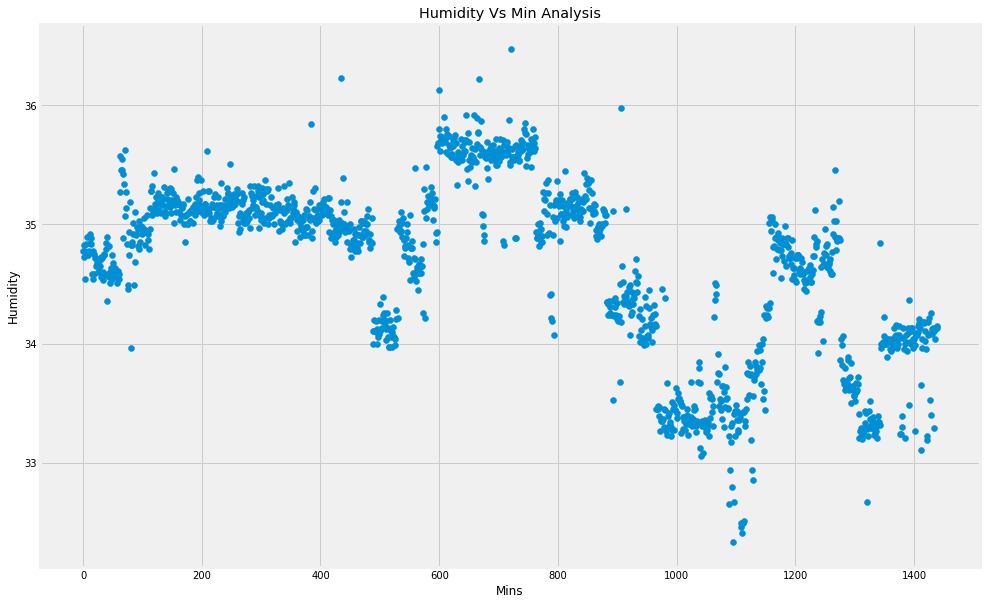

In [50]:
plt.figure(figsize=(15,10))
byh = X1.loc[:,['humidity','minute']].groupby('minute').mean()
plt.scatter(np.array(byh.index),byh['humidity'])
plt.title('Humidity Vs Min Analysis')
plt.xlabel('Mins')
plt.ylabel('Humidity')
plt.savefig("MON_MINUTE.jpg")

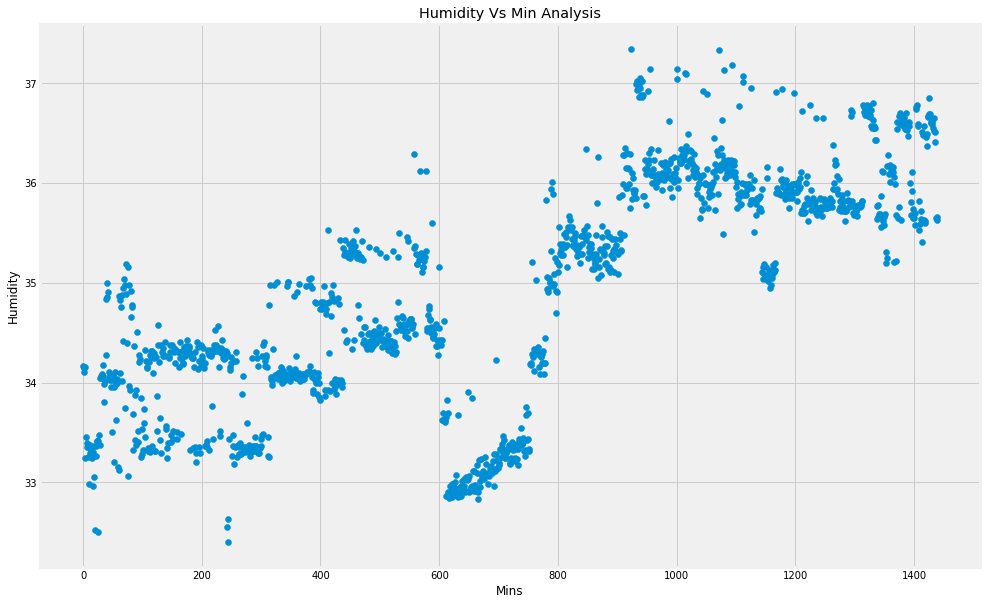

In [51]:
plt.figure(figsize=(15,10))
byh = X2.loc[:,['humidity','minute']].groupby('minute').mean()
plt.scatter(np.array(byh.index),byh['humidity'])
plt.title('Humidity Vs Min Analysis')
plt.xlabel('Mins')
plt.ylabel('Humidity')
plt.savefig("TUE_MINUTE.jpg")

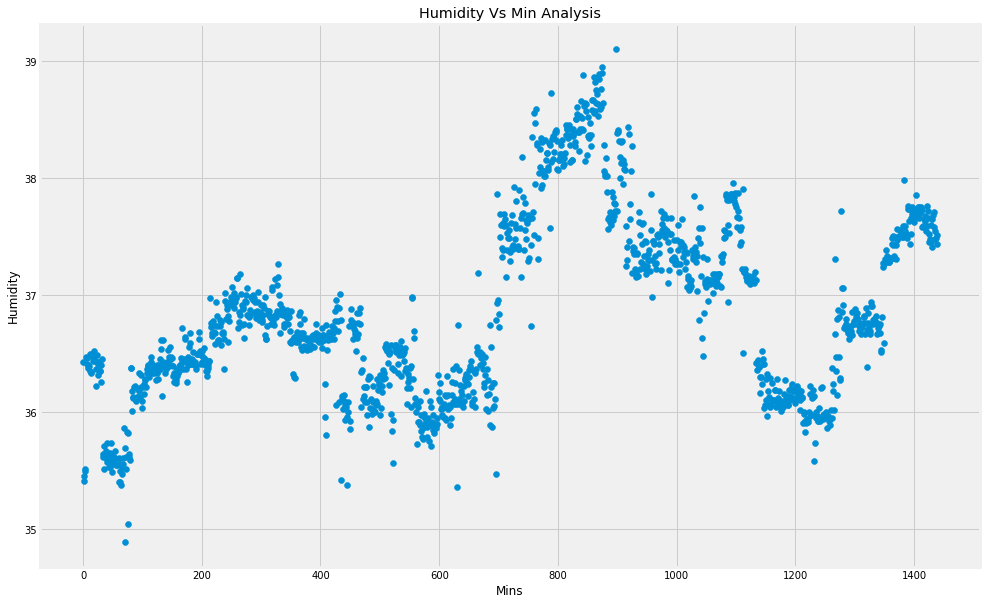

In [52]:
plt.figure(figsize=(15,10))
byh = X3.loc[:,['humidity','minute']].groupby('minute').mean()
plt.scatter(np.array(byh.index),byh['humidity'])
plt.title('Humidity Vs Min Analysis')
plt.xlabel('Mins')
plt.ylabel('Humidity')
plt.savefig("WED_MINUTE.jpg")

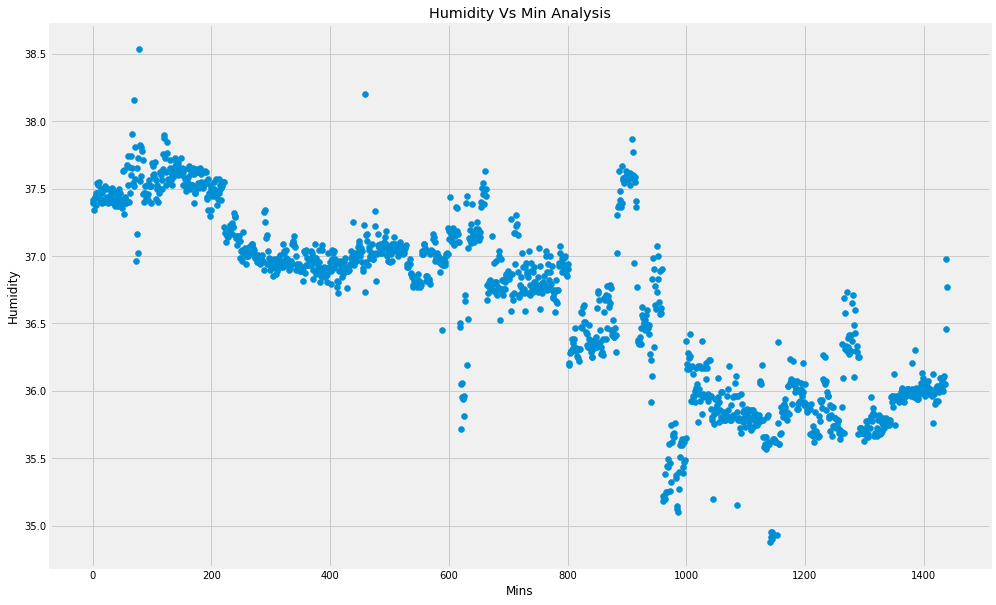

In [53]:
plt.figure(figsize=(15,10))
byh = X4.loc[:,['humidity','minute']].groupby('minute').mean()
plt.scatter(np.array(byh.index),byh['humidity'])
plt.title('Humidity Vs Min Analysis')
plt.xlabel('Mins')
plt.ylabel('Humidity')
plt.savefig("THURS_MINUTE.jpg")

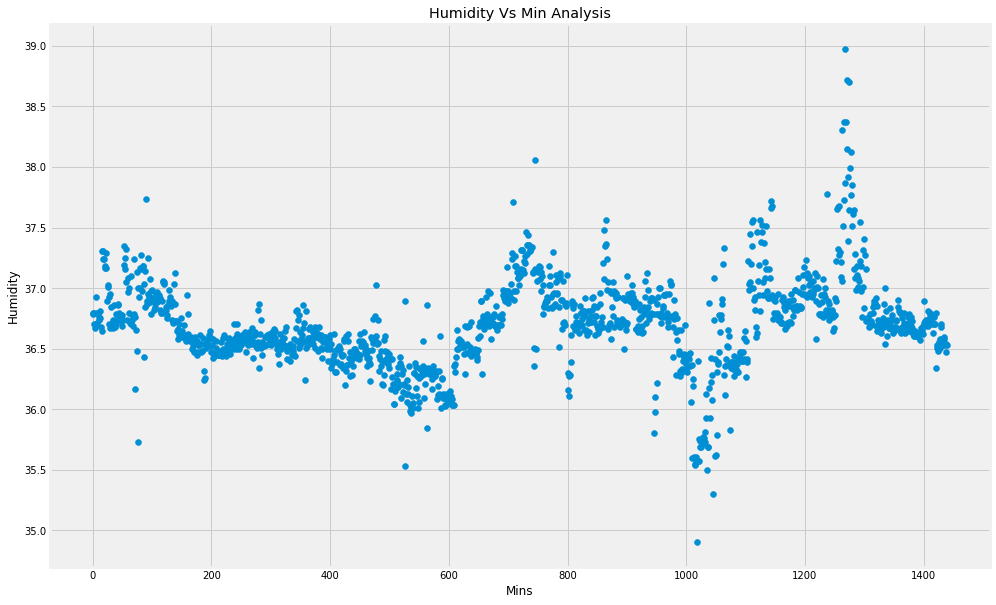

In [54]:
plt.figure(figsize=(15,10))
byh = X5.loc[:,['humidity','minute']].groupby('minute').mean()
plt.scatter(np.array(byh.index),byh['humidity'])
plt.title('Humidity Vs Min Analysis')
plt.xlabel('Mins')
plt.ylabel('Humidity')
plt.savefig("FRI_MINUTE.jpg")

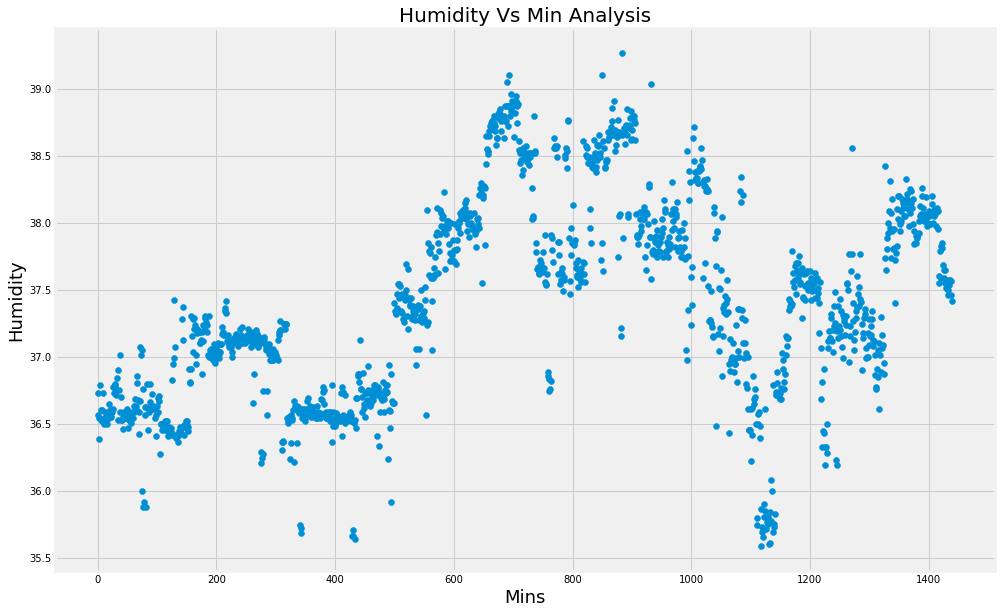

In [59]:
plt.figure(figsize=(15,10))
byh = X6.loc[:,['humidity','minute']].groupby('minute').mean()
plt.scatter(np.array(byh.index),byh['humidity'])
plt.title('Humidity Vs Min Analysis',size=20)
plt.xlabel('Mins',size=18)
plt.ylabel('Humidity',size=18)
plt.savefig("SAT_MINUTE.jpg")

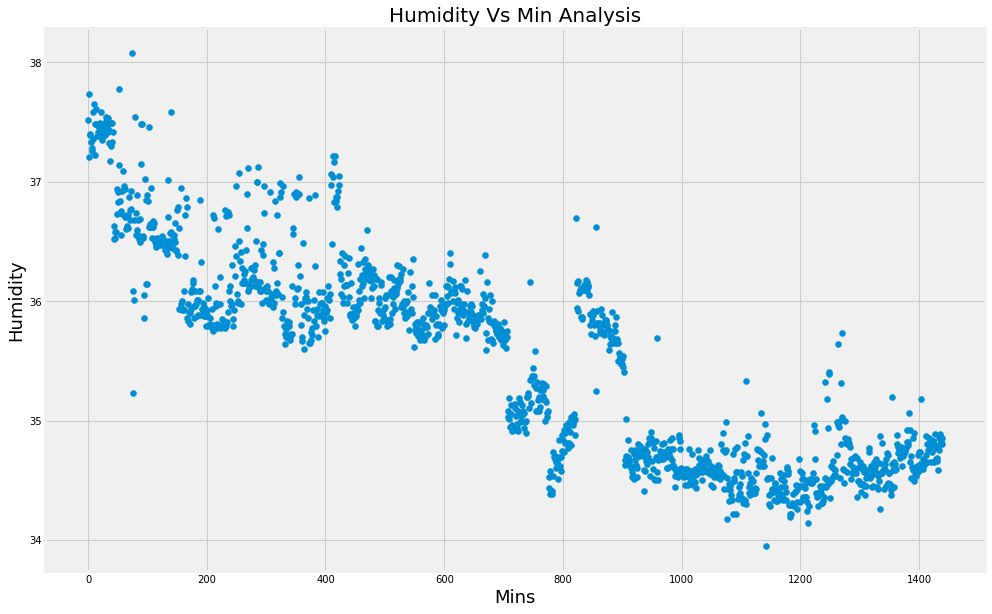

In [63]:
plt.figure(figsize=(15,10))
byh = X7.loc[:,['humidity','minute']].groupby('minute').mean()
plt.scatter(np.array(byh.index),byh['humidity'])
plt.title('Humidity Vs Min Analysis',size=20)
plt.xlabel('Mins',size=18)
plt.ylabel('Humidity',size=18)
plt.savefig("SUN_MINUTE.jpg")

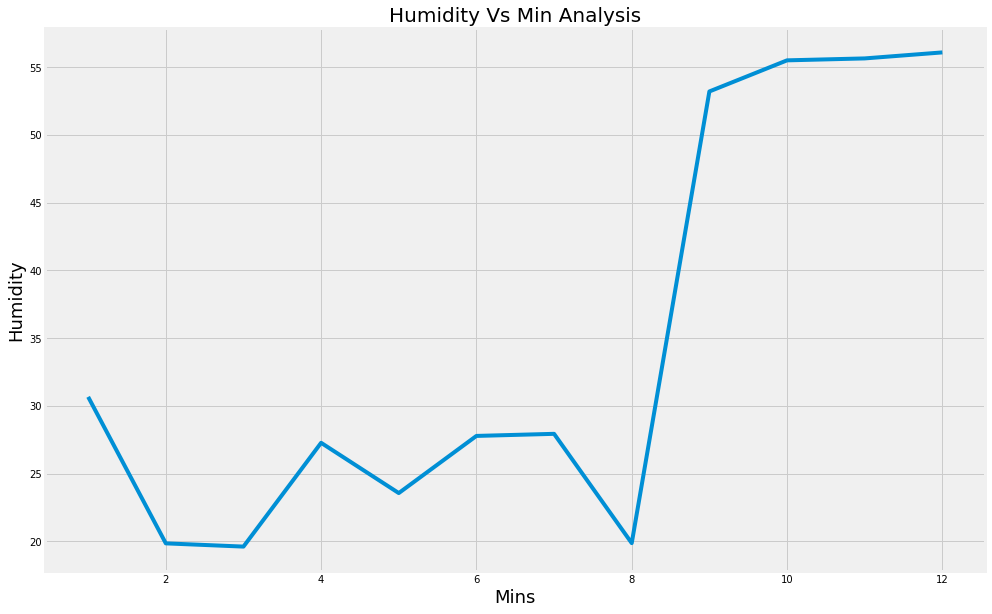

In [64]:
plt.figure(figsize=(15,10))
byh = frame.loc[:,['humidity','month']].groupby('month').mean()
plt.plot(np.array(byh.index),byh['humidity'])
plt.title('Humidity Vs Min Analysis',size=20)
plt.xlabel('Mins',size=18)
plt.ylabel('Humidity',size=18)
plt.savefig("MONTH.jpg")

In [4]:
print(X1)
df1=X1.groupby('minute',as_index=False).mean()

        temp  humidity           date_time  minute  hour day_of_week  month
7195      20        20 2016-08-22 00:00:02       0     0      Monday      8
7196      21        20 2016-08-22 00:01:01       1     0      Monday      8
7197      20        20 2016-08-22 00:02:02       2     0      Monday      8
7198      19        20 2016-08-22 00:03:01       3     0      Monday      8
7199      21        20 2016-08-22 00:04:01       4     0      Monday      8
7200      19        20 2016-08-22 00:05:02       5     0      Monday      8
7201      19        20 2016-08-22 00:06:01       6     0      Monday      8
7202      21        20 2016-08-22 00:07:01       7     0      Monday      8
7203      21        20 2016-08-22 00:08:02       8     0      Monday      8
7204      20        20 2016-08-22 00:09:01       9     0      Monday      8
7205      20        20 2016-08-22 00:10:02      10     0      Monday      8
7206      20        20 2016-08-22 00:11:01      11     0      Monday      8
7207      20

In [114]:
print(df1)
df1.dtypes

      minute       temp   humidity  hour     month
0          0  19.311688  34.779221   0.0  6.454545
1          1  19.285714  34.727273   0.0  6.454545
2          2  19.289474  34.828947   0.0  6.526316
3          3  19.269231  34.538462   0.0  6.384615
4          4  19.207792  34.779221   0.0  6.454545
5          5  19.181818  34.831169   0.0  6.454545
6          6  19.285714  34.740260   0.0  6.454545
7          7  19.168831  34.896104   0.0  6.454545
8          8  19.220779  34.740260   0.0  6.454545
9          9  19.181818  34.753247   0.0  6.454545
10        10  19.233766  34.779221   0.0  6.454545
11        11  19.246753  34.922078   0.0  6.454545
12        12  19.259740  34.844156   0.0  6.454545
13        13  19.194805  34.883117   0.0  6.454545
14        14  19.207792  34.831169   0.0  6.454545
15        15  19.207792  34.584416   0.0  6.454545
16        16  19.168831  34.545455   0.0  6.454545
17        17  19.155844  34.779221   0.0  6.454545
18        18  19.207792  34.753

minute        int64
temp        float64
humidity    float64
hour        float64
month       float64
dtype: object

In [5]:
m1=df1.iloc[:,[0]].values
m2=df1.iloc[:,1].values

In [82]:
print(m1)
print(m2)

[[   0]
 [   1]
 [   2]
 ...
 [1437]
 [1438]
 [1439]]
[19.31168831 19.28571429 19.28947368 ... 19.37349398 19.3253012
 19.27710843]


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(m1)
poly_reg.fit(X_poly, m2)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, m2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

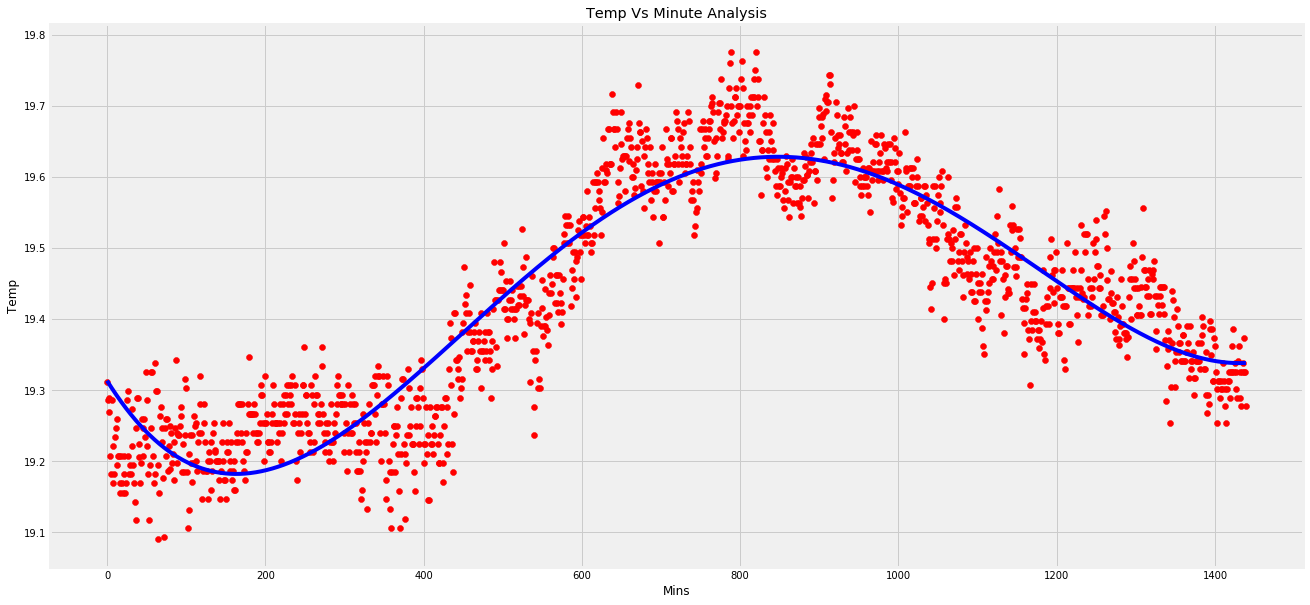

In [12]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(20,10))
plt.scatter(m1, m2, color = 'red')
plt.plot(m1, lin_reg.predict(poly_reg.fit_transform(m1)), color = 'blue')
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.show()

In [13]:
df2=X2.groupby('minute',as_index=False).mean()
t1=df2.iloc[:,[0]].values
t2=df2.iloc[:,1].values

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(t1)
poly_reg.fit(X_poly, t2)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, t2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

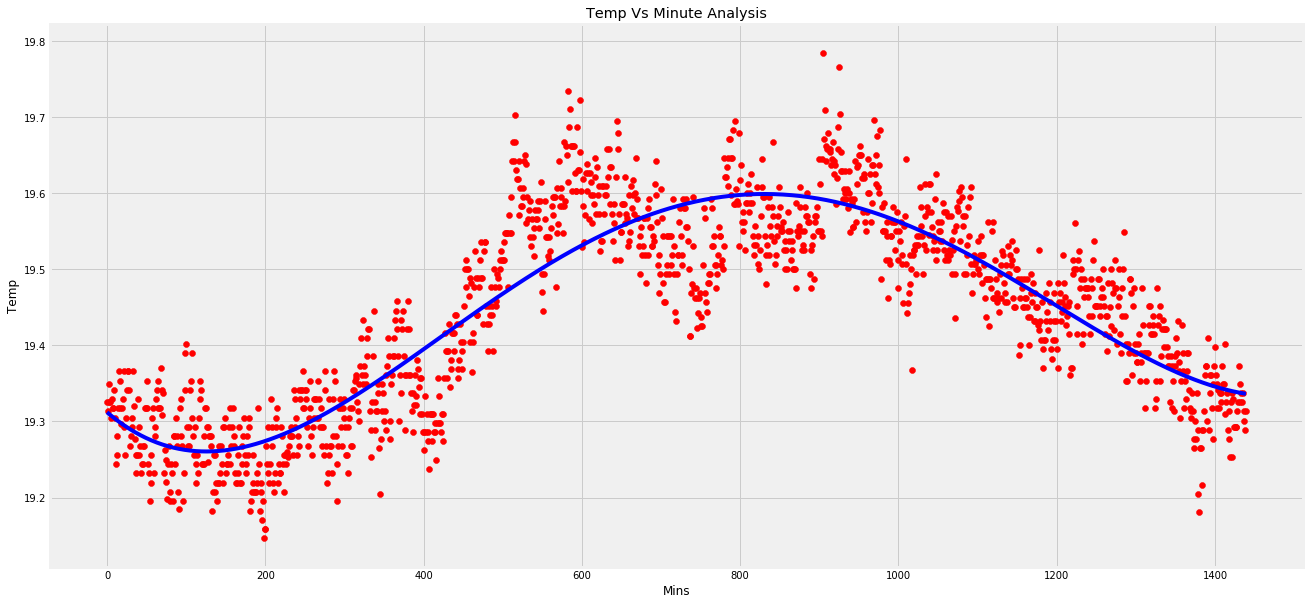

In [22]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(20,10))
plt.scatter(t1, t2, color = 'red')
plt.plot(t1, lin_reg.predict(poly_reg.fit_transform(t1)), color = 'blue')
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.show()

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [2 0 0 0 0]
 [1 1 0 0 0]
 [1 0 1 0 0]
 [1 0 0 1 0]
 [1 0 0 0 1]
 [0 2 0 0 0]
 [0 1 1 0 0]
 [0 1 0 1 0]
 [0 1 0 0 1]
 [0 0 2 0 0]
 [0 0 1 1 0]
 [0 0 1 0 1]
 [0 0 0 2 0]
 [0 0 0 1 1]
 [0 0 0 0 2]
 [3 0 0 0 0]
 [2 1 0 0 0]
 [2 0 1 0 0]
 [2 0 0 1 0]
 [2 0 0 0 1]
 [1 2 0 0 0]
 [1 1 1 0 0]
 [1 1 0 1 0]
 [1 1 0 0 1]
 [1 0 2 0 0]
 [1 0 1 1 0]
 [1 0 1 0 1]
 [1 0 0 2 0]
 [1 0 0 1 1]
 [1 0 0 0 2]
 [0 3 0 0 0]
 [0 2 1 0 0]
 [0 2 0 1 0]
 [0 2 0 0 1]
 [0 1 2 0 0]
 [0 1 1 1 0]
 [0 1 1 0 1]
 [0 1 0 2 0]
 [0 1 0 1 1]
 [0 1 0 0 2]
 [0 0 3 0 0]
 [0 0 2 1 0]
 [0 0 2 0 1]
 [0 0 1 2 0]
 [0 0 1 1 1]
 [0 0 1 0 2]
 [0 0 0 3 0]
 [0 0 0 2 1]
 [0 0 0 1 2]
 [0 0 0 0 3]
 [4 0 0 0 0]
 [3 1 0 0 0]
 [3 0 1 0 0]
 [3 0 0 1 0]
 [3 0 0 0 1]
 [2 2 0 0 0]
 [2 1 1 0 0]
 [2 1 0 1 0]
 [2 1 0 0 1]
 [2 0 2 0 0]
 [2 0 1 1 0]
 [2 0 1 0 1]
 [2 0 0 2 0]
 [2 0 0 1 1]
 [2 0 0 0 2]
 [1 3 0 0 0]
 [1 2 1 0 0]
 [1 2 0 1 0]
 [1 2 0 0 1]
 [1 1 2 0 0]
 [1 1 1 1 0]

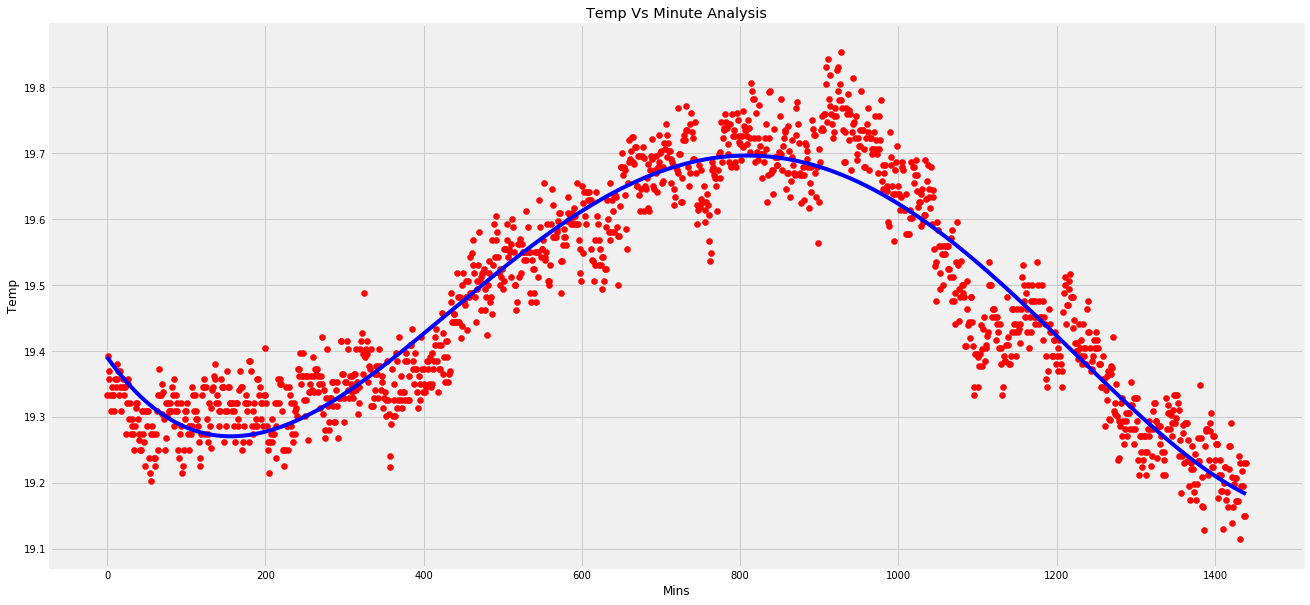

In [31]:
df3=X3.groupby('minute',as_index=False).mean()
w1=df3.iloc[:,[0]].values
w2=df3.iloc[:,1].values

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(w1)
poly_reg.fit(X_poly, w2)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, w2)

# Visualising the Polynomial Regression results
plt.figure(figsize=(20,10))
plt.scatter(w1, w2, color = 'red')
plt.plot(w1, lin_reg.predict(poly_reg.fit_transform(w1)), color = 'blue')
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.show()

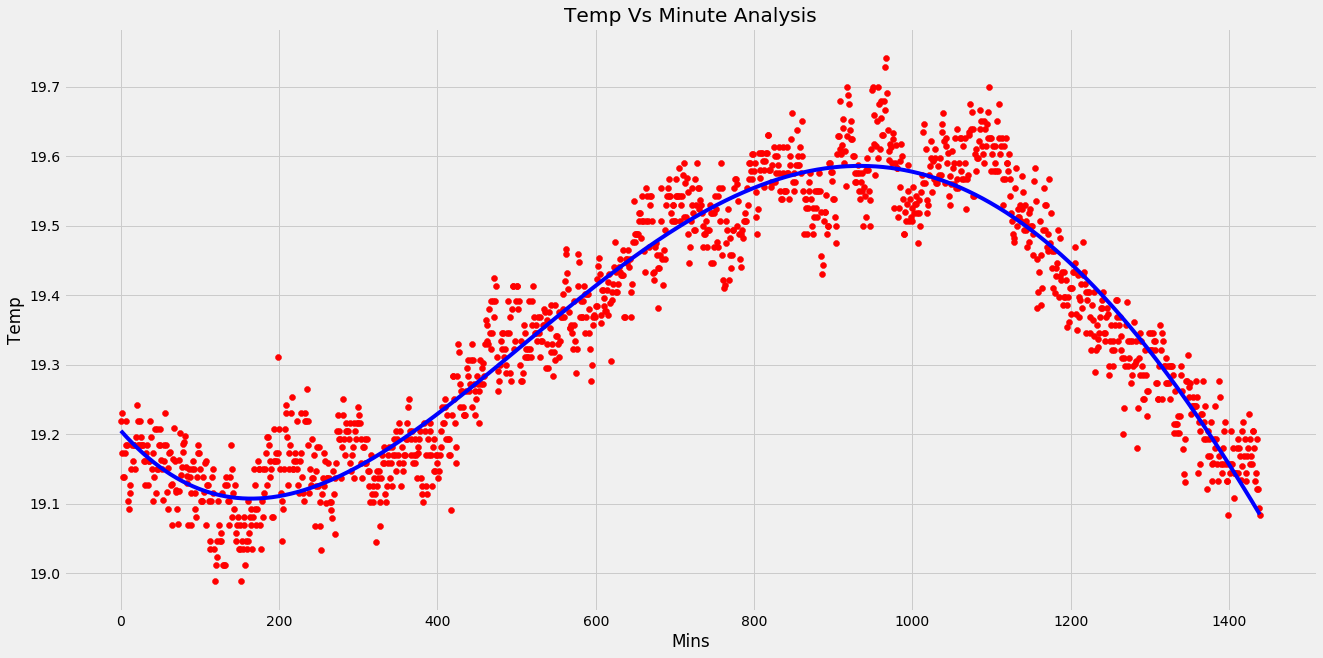

In [108]:
df4=X4.groupby('minute',as_index=False).mean()
th1=df4.iloc[:,[0]].values
th2=df4.iloc[:,1].values

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(th1)
poly_reg.fit(X_poly, th2)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, th2)

# Visualising the Polynomial Regression results
plt.figure(figsize=(20,10))
plt.scatter(th1, th2, color = 'red')
plt.plot(th1, lin_reg.predict(poly_reg.fit_transform(th1)), color = 'blue')
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.show()

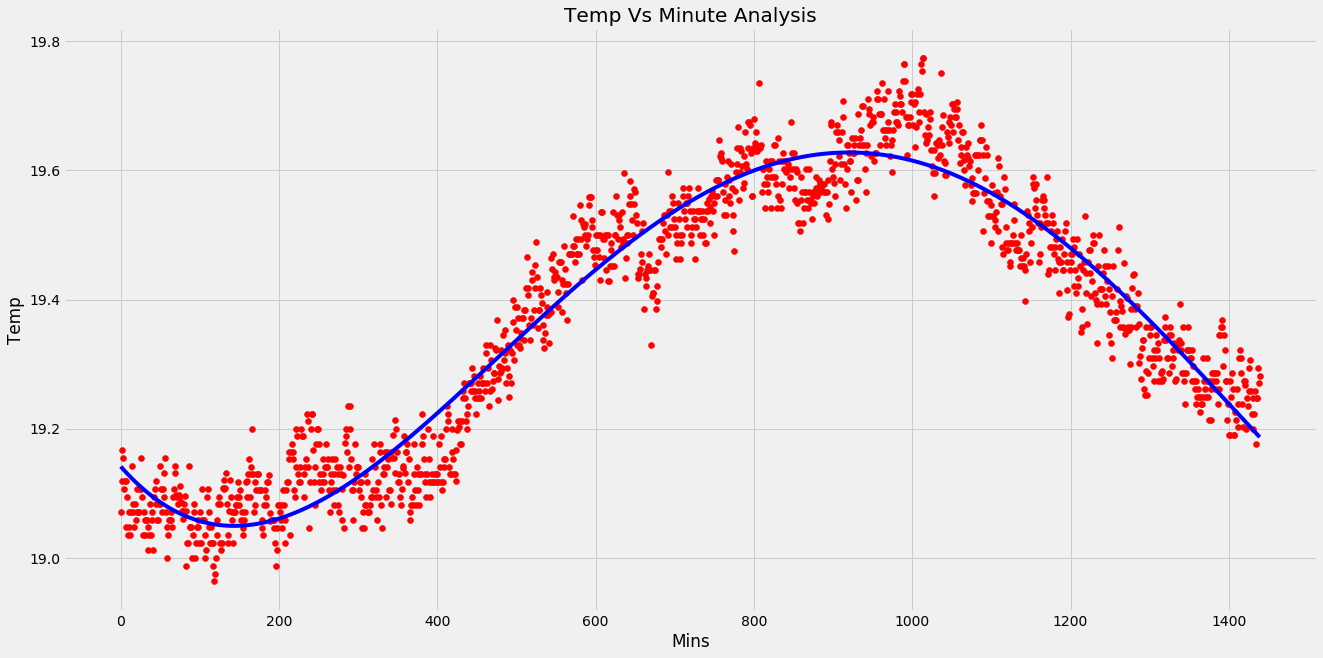

In [109]:
df5=X5.groupby('minute',as_index=False).mean()
f1=df5.iloc[:,[0]].values
f2=df5.iloc[:,1].values

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(f1)
poly_reg.fit(X_poly, f2)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, f2)

# Visualising the Polynomial Regression results
plt.figure(figsize=(20,10))
plt.scatter(f1, f2, color = 'red')
plt.plot(f1, lin_reg.predict(poly_reg.fit_transform(f1)), color = 'blue')
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.show()

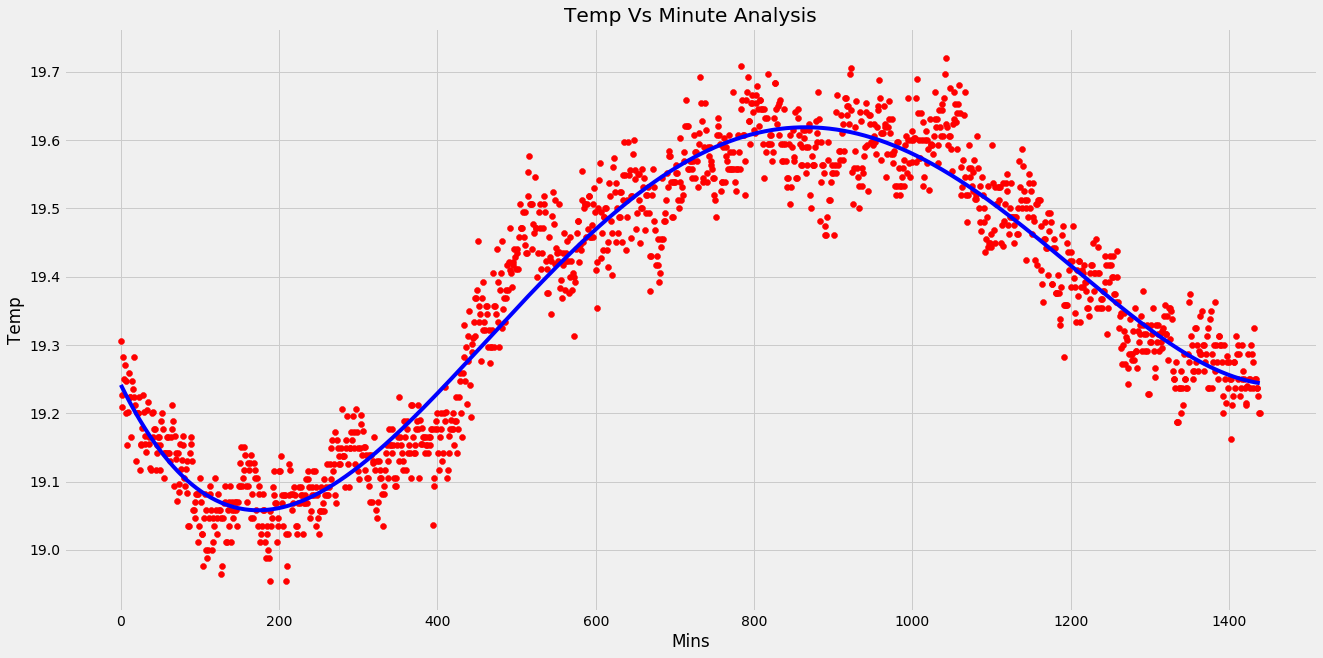

In [110]:
df6=X6.groupby('minute',as_index=False).mean()
sa1=df6.iloc[:,[0]].values
sa2=df6.iloc[:,1].values

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(sa1)
poly_reg.fit(X_poly, sa2)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, sa2)

# Visualising the Polynomial Regression results
plt.figure(figsize=(20,10))
plt.scatter(sa1, sa2, color = 'red')
plt.plot(sa1, lin_reg.predict(poly_reg.fit_transform(sa1)), color = 'blue')
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.show()

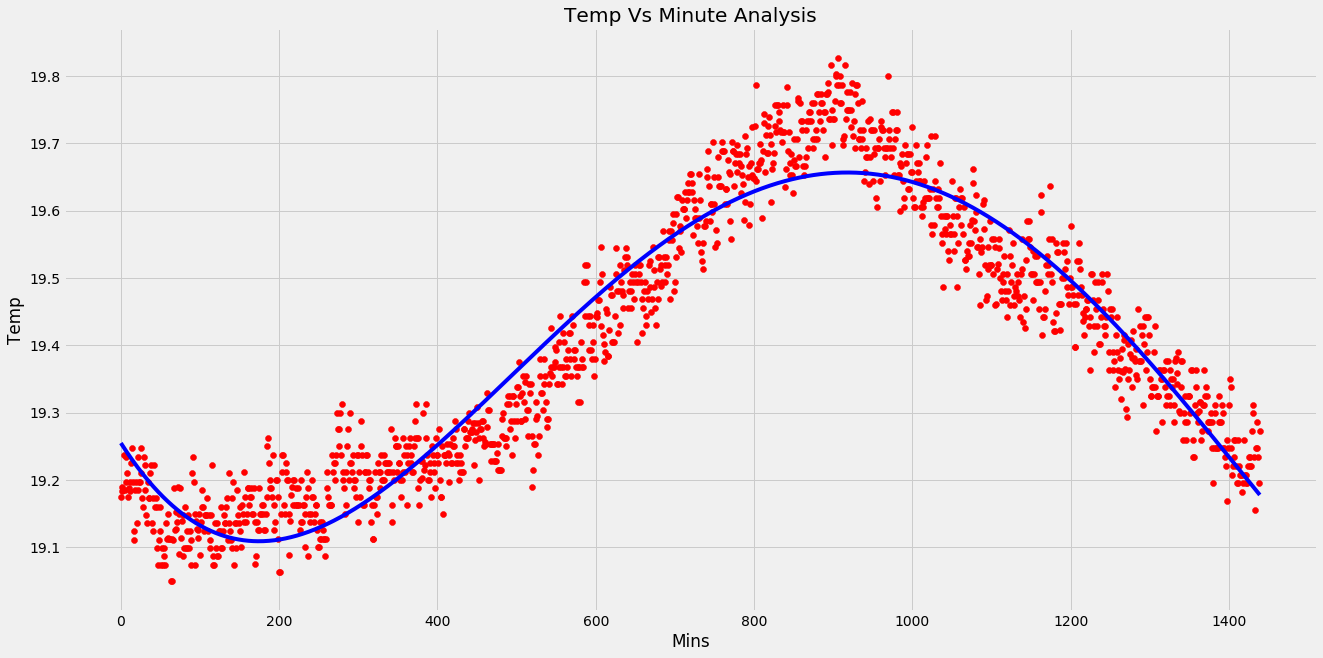

In [111]:
df7=X7.groupby('minute',as_index=False).mean()
su1=df7.iloc[:,[0]].values
su2=df7.iloc[:,1].values

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(su1)
poly_reg.fit(X_poly, su2)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, su2)

# Visualising the Polynomial Regression results
plt.figure(figsize=(20,10))
plt.scatter(su1, su2, color = 'red')
plt.plot(su1, lin_reg.predict(poly_reg.fit_transform(su1)), color = 'blue')
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.show()

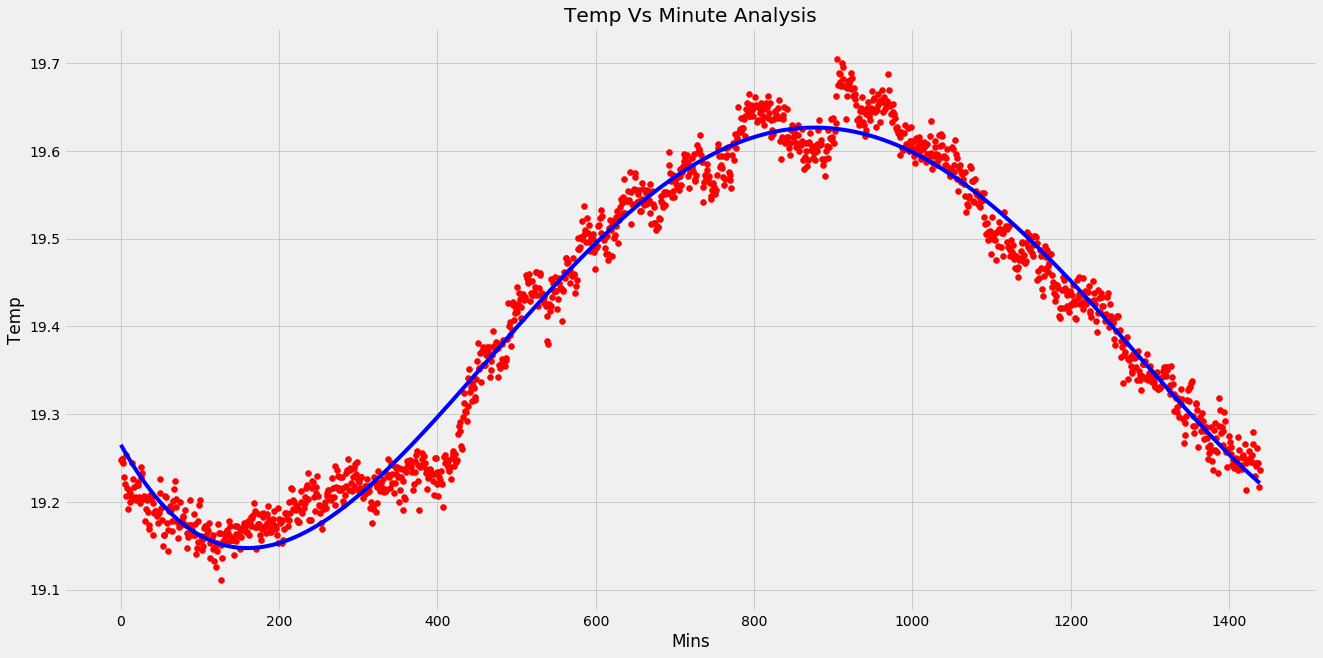

In [115]:
df=frame.groupby('minute',as_index=False).mean()
w1=df.iloc[:,[0]].values
w2=df.iloc[:,1].values

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(w1)
poly_reg.fit(X_poly, w2)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, w2)

# Visualising the Polynomial Regression results
plt.figure(figsize=(20,10))
plt.scatter(w1, w2, color = 'red')
plt.plot(w1, lin_reg.predict(poly_reg.fit_transform(w1)), color = 'blue')
plt.title('Temp Vs Minute Analysis')
plt.xlabel('Mins')
plt.ylabel('Temp')
plt.show()

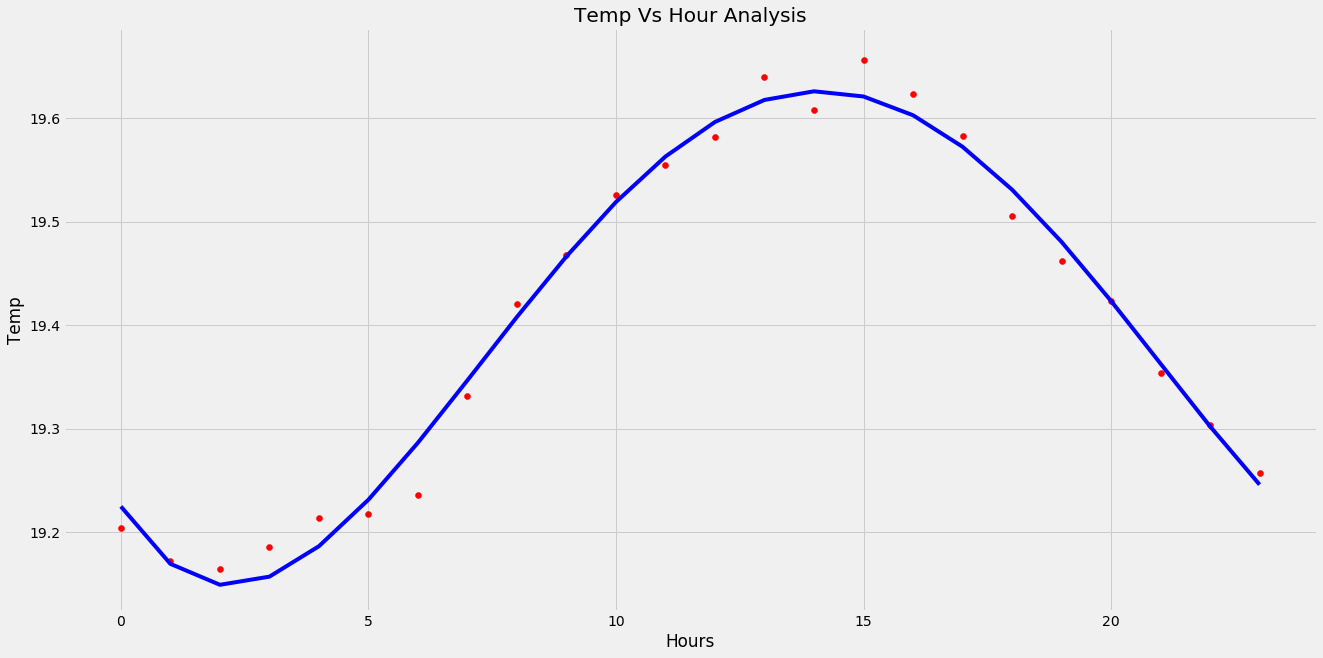

In [116]:
DF=frame.groupby('hour',as_index=False).mean()
w1=DF.iloc[:,[0]].values
w2=DF.iloc[:,1].values

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(w1)
poly_reg.fit(X_poly, w2)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, w2)

# Visualising the Polynomial Regression results
plt.figure(figsize=(20,10))
plt.scatter(w1, w2, color = 'red')
plt.plot(w1, lin_reg.predict(poly_reg.fit_transform(w1)), color = 'blue')
plt.title('Temp Vs Hour Analysis')
plt.xlabel('Hours')
plt.ylabel('Temp')
plt.show()

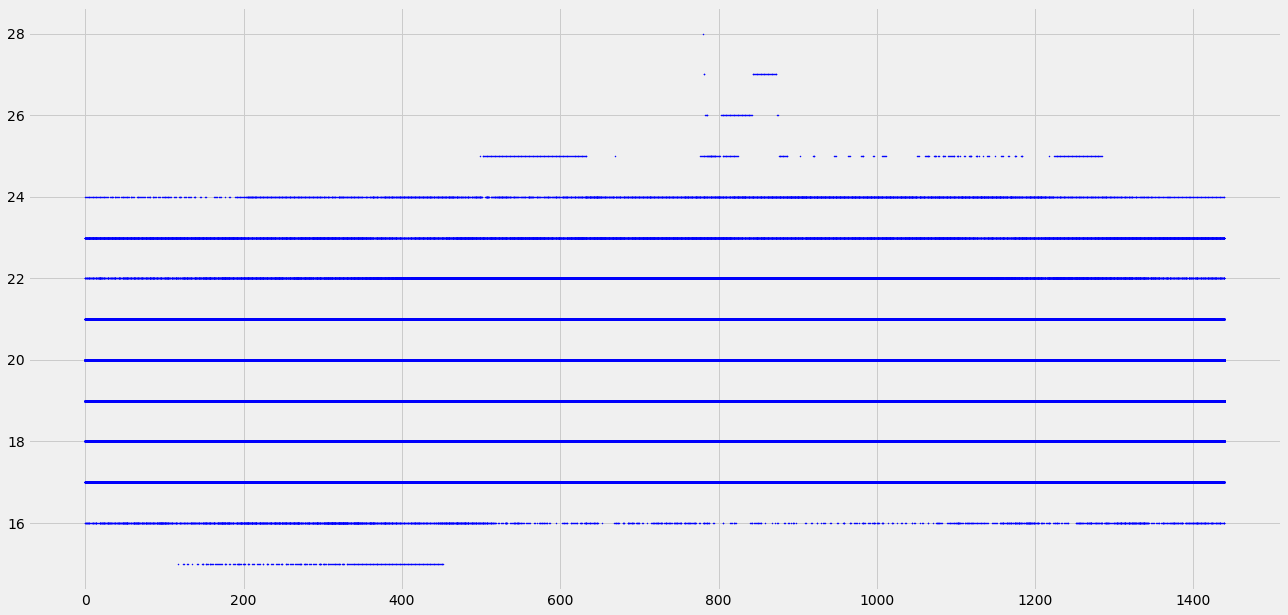

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(frame['minute'],frame['temp'],c='blue',s=1)
plt.show()

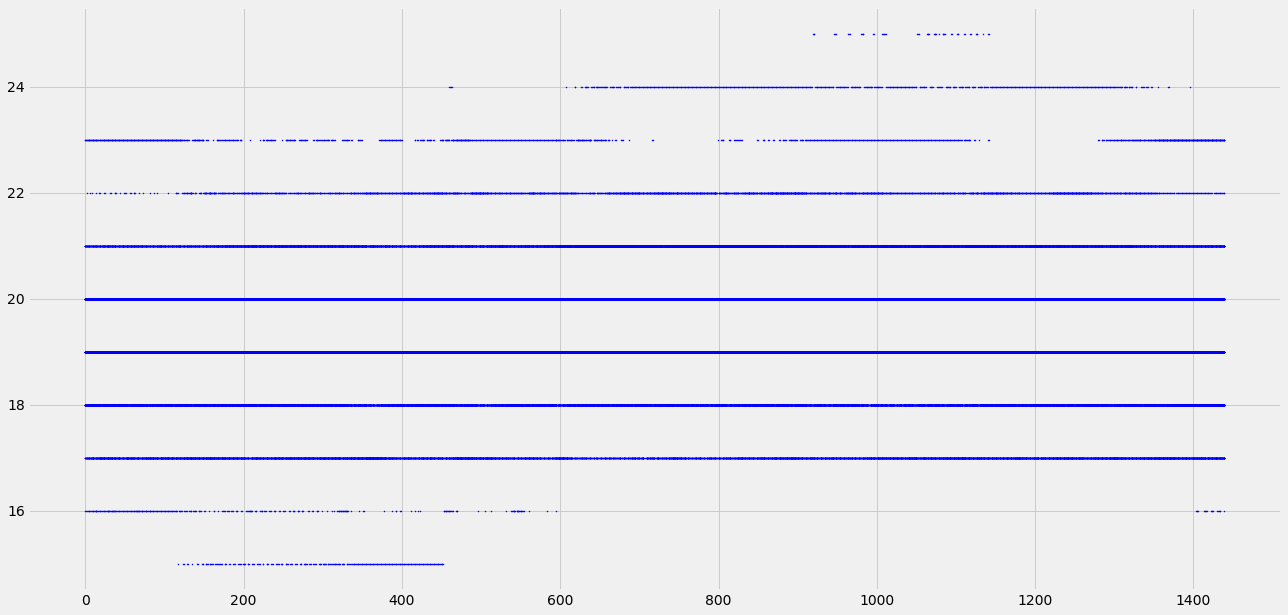

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(X1['minute'],X1['temp'],c='blue',s=1)
plt.show()